In [1]:
# imports used in all cells
import gpac
import sympy
import numpy as np

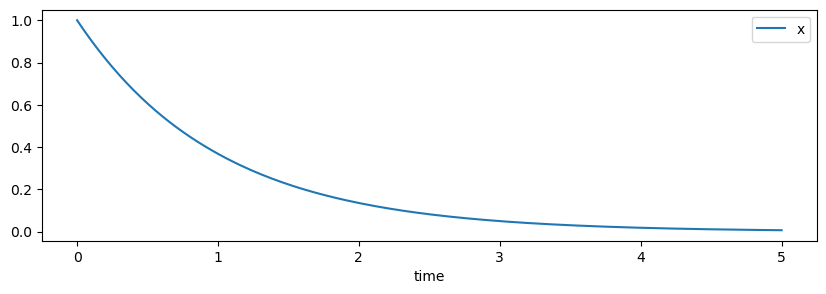

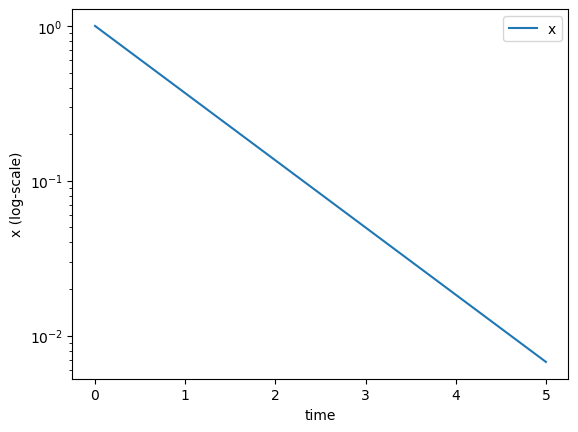

In [2]:
# exponential decay
x = sympy.symbols('x')
odes = {x: -x}                  # differential equation  x' = -x
initial_values = {x: 1}         # initial value of x
t_eval = np.linspace(0, 5, 200) # times at which to plot values of x

# This creates the first plot below.
gpac.plot(odes, initial_values, t_eval=t_eval)

# for more control over plotting, call integrate_odes to get solution 
# and plot it directly using matplotlib functions
# the `solution` object below is the same returned from scipy.integrate.solve_ivp:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
# This creates the second plot below with a log-scale y-axis.
solution = gpac.integrate_odes(odes, initial_values, t_eval=t_eval)
import matplotlib.pyplot as plt
plt.plot(solution.t, solution.y[0], label='x')
plt.legend()
plt.yscale('log')
plt.ylabel('x (log-scale)')
plt.xlabel('time')
plt.show()

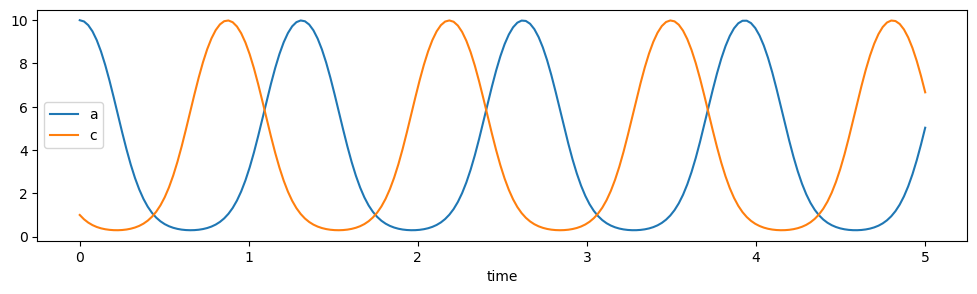

times = [0.   0.25 0.5  0.75 1.  ]
a = [10.          4.84701622  0.58753815  0.38765743  3.07392998]
b = [1.         6.84903338 9.63512628 3.03634559 0.38421121]
c = [1.         0.3039504  1.77733557 8.57599698 8.54185881]


In [3]:
# plot solution to rock-paper-scissors (RPS) oscillator described by these chemical reactions:
# A+B -> 2B
# B+C -> 2C
# C+A -> 2A
a,b,c = sympy.symbols('a b c')

odes = {
    a: -a*b + c*a,
    b: -b*c + a*b,
    c: -c*a + b*c,
}
initial_values = {
    a: 10,
    b: 1,
    c: 1,
}
t_eval = np.linspace(0, 5, 200)

# adjust figure size and plot only trajectories for a and c
gpac.plot(odes, initial_values, t_eval=t_eval, figure_size=(12,3), symbols_to_plot=[a,c])

# print some values along trajectory
t_eval = np.linspace(0, 1, 5)
solution = gpac.integrate_odes(odes, initial_values, t_eval=t_eval)
print(f'times = {solution.t}')
print(f'a = {solution.y[0]}')
print(f'b = {solution.y[1]}')
print(f'c = {solution.y[2]}')

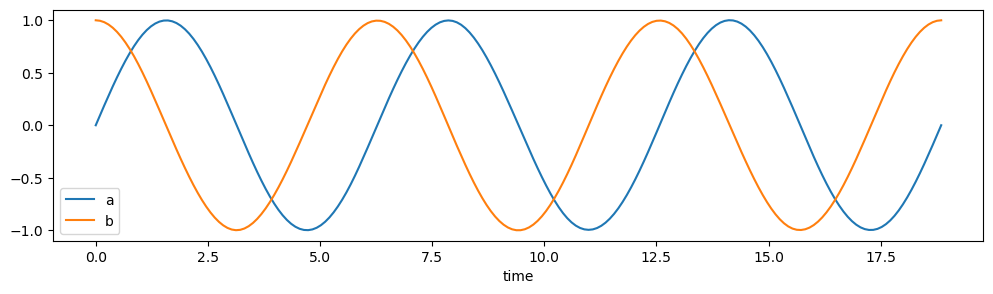

In [4]:
# trick to reference time variable directly in ODEs by introducing new variable t with derivative 1
from sympy import sin, cos
from math import pi

a,b,t = sympy.symbols('a b t')
odes = {
    a: cos(t),
    b: -sin(t),
    t: 1,
}
initial_values = {
    a: 0,
    b: 1,
    t: 0,
}
t_eval = np.linspace(0, 3*2*pi, 200)
gpac.plot(odes, initial_values, t_eval=t_eval, figure_size=(12,3), symbols_to_plot=[a,b])

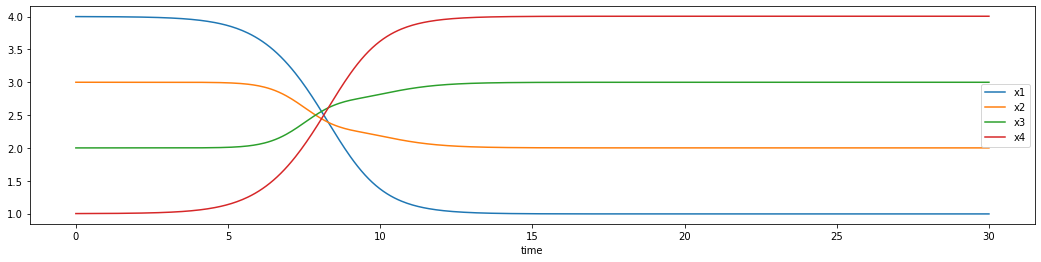

In [49]:
# bubble sort values x1, x2, x3, x4
x1,x2,x3,x4,y1,y2,y3 = sympy.symbols('x1 x2 x3 x4 y1 y2 y3')

odes = {
    x1: -y1,
    x2: -y2+y1,
    x3: -y3+y2,
    x4: y3,
    y1: (x1-x2)*y1,
    y2: (x2-x3)*y2,
    y3: (x3-x4)*y3,
}
eps = 0.001
initial_values = {
    x1: 4,
    x2: 3,
    x3: 2,
    x4: 1,
    y1: eps,
    y2: eps,
    y3: eps,
}
t_eval = np.linspace(0,30,500)
gpac.plot(odes, initial_values, t_eval, figure_size=(18,4), symbols_to_plot=[x1,x2,x3,x4])

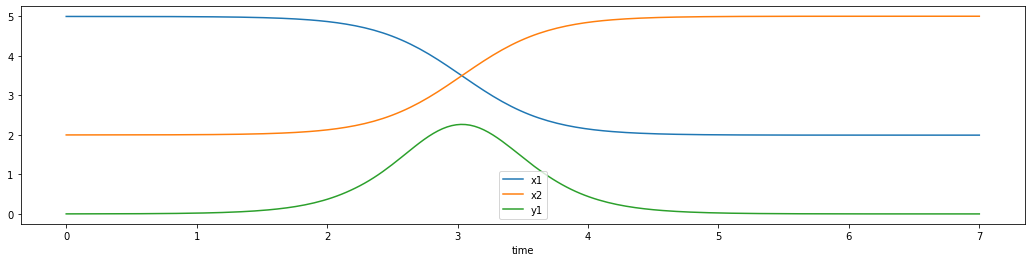

In [34]:
# bubble sort values x1, x2, x3, x4
x1,x2,y1 = sympy.symbols('x1 x2 y1')

odes = {
    x1: -y1,
    x2: y1,
    y1: (x1-x2)*y1,
}
eps = 0.001
initial_values = {
    x1: 5,
    x2: 2,
    y1: eps,
}
t_eval = np.linspace(0,7,200)
gpac.plot(odes, initial_values, t_eval, figure_size=(18,4), symbols_to_plot=[x1,x2,y1])

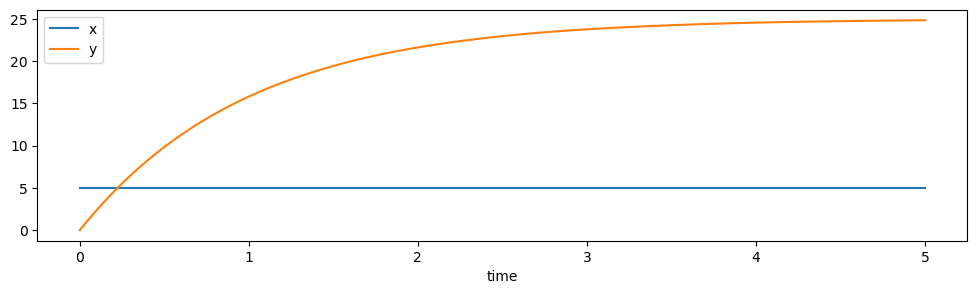

In [6]:
# plot solution to ODEs of this CRN that computes f(x) = x^2, 
#   writing down the ODEs directly
# 2X -> 2X+Y
# Y -> nothing
x,y = sympy.symbols('x y')

odes = {
    x: 0,
    y: x**2 - y,
}
initial_values = {
    x: 5,
}
t_eval = np.linspace(0, 5, 200)

gpac.plot(odes, initial_values, t_eval=t_eval, figure_size=(12,3), symbols_to_plot=[x,y])

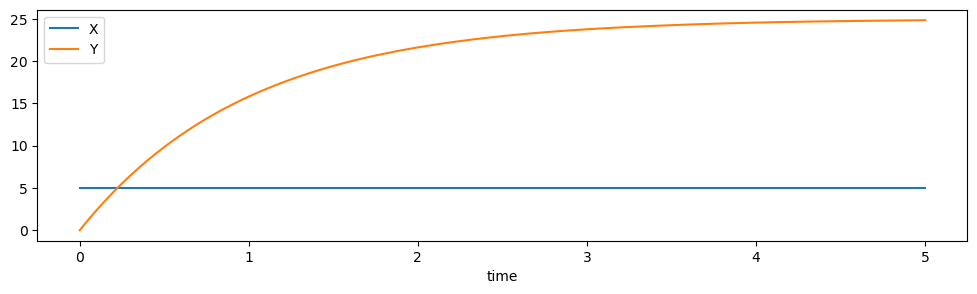

times = [0.   1.25 2.5  3.75 5.  ]
X = [5. 5. 5. 5. 5.]
Y = [ 0.         17.83557385 22.94880382 24.412418   24.82758534]
ODEs for reactions:
X' = 0
Y' = X**2 - Y


In [6]:
# plot solution to ODEs of this CRN that computes f(x) = x^2,
#   writing down the reactions and letting plot_crn compute the ODEs
# 2X -> 2X+Y
# Y -> nothing
x,y = gpac.species('X Y')

rxns = [
    x+x >> x+x+y,
    y >> gpac.empty,
]
initial_values = {x:5}
t_eval = np.linspace(0, 5, 100)

# plot trajectory of concentrations
gpac.plot_crn(rxns, initial_values, t_eval=t_eval, figure_size=(12,3))

# print some values along trajectory
solution = gpac.integrate_crn_odes(rxns, initial_values, t_eval=np.linspace(0, 5, 5))
print(f'times = {solution.t}')
print(f'X = {solution.y[0]}')
print(f'Y = {solution.y[1]}')

# print ODEs associated with reactions
print(f'ODEs for reactions:')
odes = gpac.crn_to_odes(rxns)
for symbol, ode in odes.items():
    print(f"{symbol}' = {ode}")

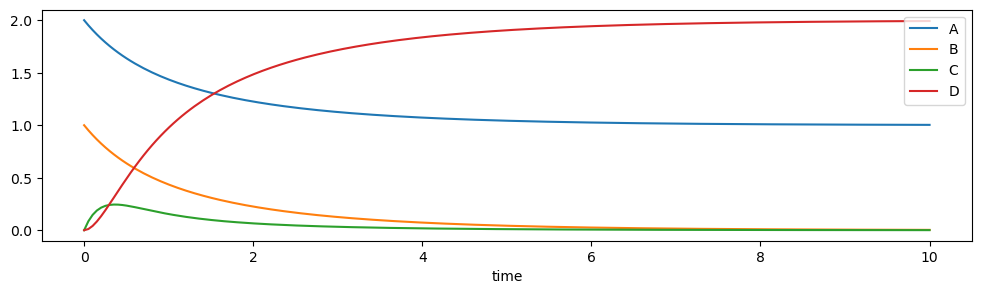

In [8]:
# examples of additional CRN notation
# You can specify reversible reactions, and rate constants in each direction.

# This encodes the CRN
# A+B --0.5--> 2C
#  2C ---4---> A+B
#   C ---5---> D
# The first two reactions are specified as a reversible reaction using | instead of >>
# k means the forward rate constant, r means the reverse rate constant (each is 1.0 if not specified)
a,b,c,d = gpac.species('A B C D')
rxns = [
    (a+b | 2*c).k(0.5).r(4), 
    (c >> d).k(5),
]
initial_values = {a:2, b:1}
t_eval = np.linspace(0, 10, 200)
gpac.plot_crn(rxns, initial_values, t_eval=t_eval, figure_size=(12,3))

In [9]:
# convert CRN to ODEs
x, y, c = gpac.species('X Y C')
rxns = [
    (x+x >> c).k(1.5),
    (c+x >> c+y).k(0.2),
]
odes = gpac.crn_to_odes(rxns)
for symbol, ode in odes.items():
    print(f"{symbol}' = {ode}")

X' = -0.2*C*X - 3.0*X**2
C' = 1.5*X**2
Y' = 0.2*C*X
